<a href="https://colab.research.google.com/github/EnesAgirman/Machine_Learning/blob/main/Codes/Linear%20Regression/Linear_Regression_Locally_Weighted_Stochastic_Gradient_Descent.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

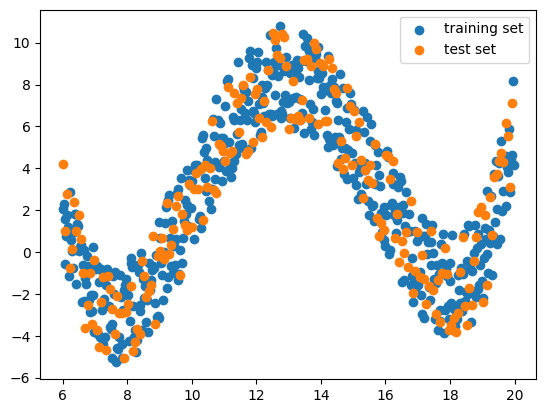

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import random
import math
from IPython.display import clear_output
from numpy.ma.core import squeeze
import time


range_min = 6
range_max = 20
test_count = 200
train_count = 500

## preparing the training set
X_train = np.arange(range_min, range_max, (range_max-range_min) / train_count )
Y_train = np.multiply((X_train-6), (X_train-10))
Y_train = np.multiply(Y_train, (X_train-16))
Y_train = np.multiply(Y_train, (X_train-19.5))
Y_train = Y_train / 70


Y_train = Y_train.reshape(Y_train.shape[0], 1)
Y_train = np.add(Y_train[0:], np.multiply(5, np.random.rand(Y_train.shape[0], 1)))


## preparing the test set
X_test = np.arange(range_min, range_max, (range_max-range_min) / test_count )
Y_test = np.multiply((X_test-6), (X_test-10))
Y_test = np.multiply(Y_test, (X_test-16))
Y_test = np.multiply(Y_test, (X_test-19.5))
Y_test = Y_test / 70

Y_test = Y_test.reshape(Y_test.shape[0], 1)
Y_test = np.add(Y_test[0:], np.multiply(5, np.random.rand(Y_test.shape[0], 1)))

## Plotting the results

plt.scatter(X_train, Y_train, label="training set")
plt.scatter(X_test, Y_test, label="test set")
plt.legend()


In [ ]:
def hypothesis(aTheta, aX):
  '''
  Calculate the hypothesis with given theta and aX taking the dot product of the vectors theta and X
  '''
  result = np.dot(np.squeeze(aTheta), np.squeeze(aX) )
  return result

def LWStochasticGradientDescent(x, aTheta, aTrainX, aTrainY, aAlpha, aCount, tau):
  '''
  Locally Weighted Stochastic Gradient Descent: updates the theta by using locally weighted stochastic gradient descent
  '''
  w = calcWeight(x, aTrainX[count], tau)  # The weight coresponding to the given x and the test data set
  aTheta = aTheta +  w * alpha * ( aTrainY[aCount] - hypothesis(np.squeeze(aTheta), aTrainX[aCount] ) ) * aTrainX[aCount] # The new updated theta
  return aTheta


def calcWeight(x, x_i, tau):
  '''
  Calculate the weigh for LWLR
  '''
  weight = math.exp( -(( (x_i - x) * (x_i - x) ) / (2*tau*tau)) )
  return weight

def calcAbsMeanError(aY_test, aY_pred):
  '''
  Calculates the absolute mean error
  '''
  errorSum = 0
  testSize = aY_test.shape[0]
  for i in range(testSize):
    errorSum += abs(( aY_test[i] - aY_pred[i] ) / 1)
  err = errorSum / testSize
  return err



In [ ]:
#initializing theta as zeros
theta = np.zeros((1, 1))

# The learning rate that we found using trial and error
alpha = 0.0001

# Geneating our initial hypothesis
h = hypothesis( np.squeeze(theta), np.squeeze(X_train[1:2]))

# Number of training loops
trainNum = 3

# The initial prediction of the Y values
Y_pred = np.zeros(X_test.shape[0])

Absolute Mean Error: 1.324860931810487


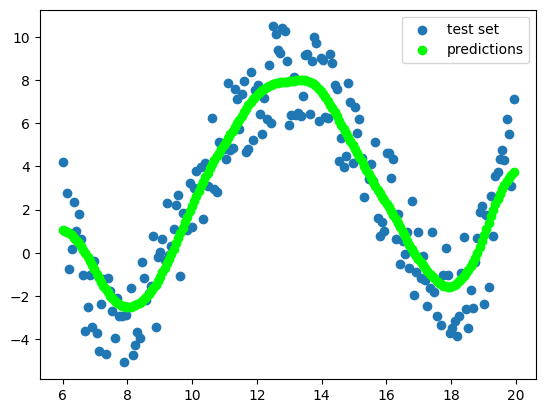

In [ ]:
## Applying the LWLR

for i in range(trainNum):
  for k in range(X_test.shape[0]):
    x = X_test[k]
    count = 0
    for xj in X_train:
      theta = LWStochasticGradientDescent(x, theta, X_train, Y_train, alpha, count, tau=0.4) # Update the parameters theta by using stochastic gradient descent
      count += 1
    Y_pred[k] = theta * x


## Displaying the end results

# plotting test set and the predictions made for the test set
plt.scatter(X_test, Y_test, label="test set")  #Scatter the (x, y) pairs onto the plot
plt.scatter(X_test, Y_pred, color='lime', label="predictions")
plt.legend()

# calculate the absolute mean error and display it
err = calcAbsMeanError(Y_test, Y_pred)
print(f"Absolute Mean Error: {str(err[0])}")
